In [5]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
path='/content/drive/My Drive/Train_aBjfeNk.csv'

In [76]:
import pandas as pd
data=pd.read_csv(path)

In [77]:
 
import numpy as np
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
class preprocessing():
   def __init__(self):
      pass
   def convertToCategory(self,df):
      cols=df.select_dtypes(['object']).columns
      for col in cols:
         df[col]=df[col].astype('category')
      return df
   def get_num_cols(self, df):
      numCols=list(df.select_dtypes(['int64','float64']).columns)
      numCols.remove('ID') 
      return numCols
   def scale_numCols(self,df, numcols):
      sc=MinMaxScaler()
      df[numCols]=sc.fit_transform(df[numCols])
      return df
   def one_hot_encode(self,df, catCols ):
      df1= df.copy()
      ohe_data=pd.get_dummies(df1[catCols])
      df1.drop(columns=catCols, axis=1, inplace =True)
      df1= pd.concat([df1,ohe_data],axis=1 )
      return df1
   def get_cat_cols(self, df):
      catCols=list(df.select_dtypes(['category']).columns)
      if 'Segmentation' in catCols:
         catCols.remove('Segmentation') 
      return catCols

In [172]:
pp=preprocessing()

In [79]:
 
data=pp.convertToCategory(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8068 non-null   int64   
 1   Gender           8068 non-null   category
 2   Ever_Married     7928 non-null   category
 3   Age              8068 non-null   int64   
 4   Graduated        7990 non-null   category
 5   Profession       7944 non-null   category
 6   Work_Experience  7239 non-null   float64 
 7   Spending_Score   8068 non-null   category
 8   Family_Size      7733 non-null   float64 
 9   Var_1            7992 non-null   category
 10  Segmentation     8068 non-null   category
dtypes: category(7), float64(2), int64(2)
memory usage: 308.7 KB


In [80]:
numCols=list(data.select_dtypes(['int64','float64']).columns)
numCols.remove('ID')
print(numCols)

['Age', 'Work_Experience', 'Family_Size']


In [81]:
catCols=list(data.select_dtypes(['category']).columns)
catCols.remove('Segmentation')
print(catCols)

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


In [ ]:
data.shape

(8068, 11)

In [ ]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

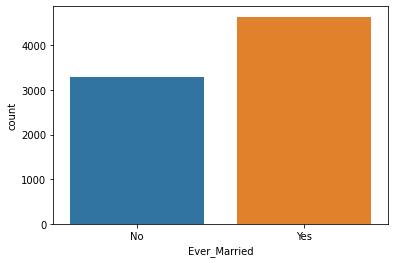

In [83]:
sns.countplot(data['Ever_Married'])

In [84]:
data['Ever_Married'].fillna('Yes',inplace=True)

In [ ]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

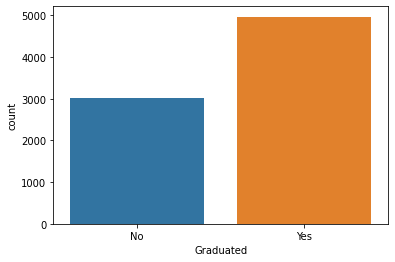

In [85]:
sns.countplot(data['Graduated'])

In [86]:
 data['Graduated'].fillna('Yes',inplace=True)

In [ ]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

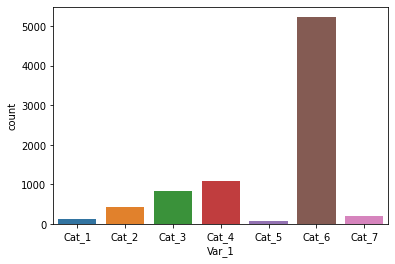

In [87]:
sns.countplot(data['Var_1'])

In [88]:
data['Var_1'].fillna('Cat_6',inplace=True)

In [ ]:
 data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

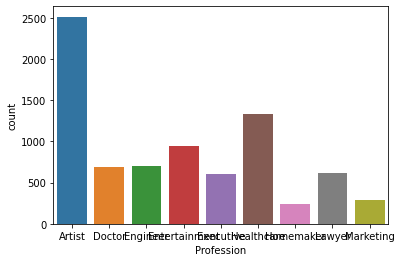

In [89]:
sns.countplot(data['Profession'])

In [90]:
 data['Profession'].fillna('Artist',inplace=True)

In [ ]:
  data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

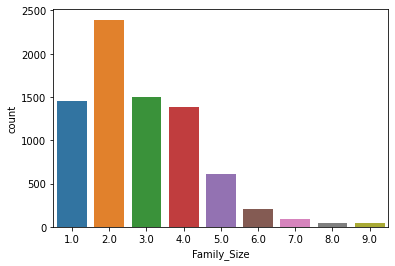

In [91]:
sns.countplot(data['Family_Size'])

In [92]:
data['Family_Size'].fillna(data['Family_Size'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [93]:
data['Work_Experience'].fillna(data['Work_Experience'].mean(),inplace=True)

In [94]:
 data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [95]:
allCols=list(data.columns)
 
allCols.remove('Segmentation')
print(allCols)
target='Segmentation'

['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']


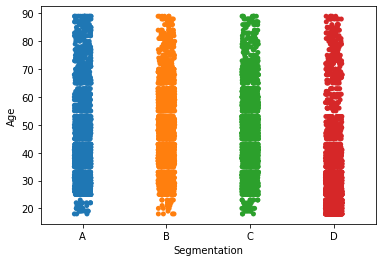

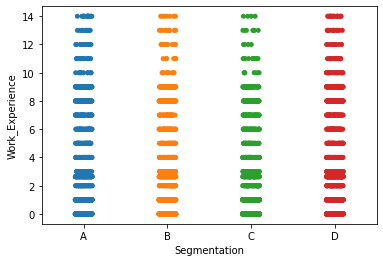

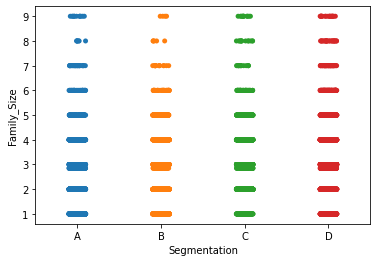

In [28]:
#numerical bivariate
 
for col in numCols:
  sns.stripplot(data[target], data[col])
  plt.show()

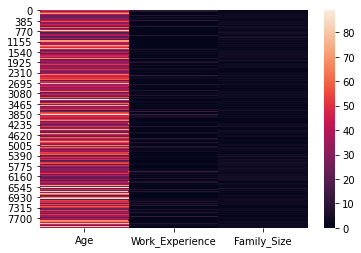

In [29]:
sns.heatmap(data[numCols])

In [29]:
class visualizations ():
   def __init__(self):
      pass
   def plot_violin(self, df,numCols):
     for col in numCols:
        plt.figure(figsize=(12,10))
        sns.violinplot(df[target],df[col])
   def plot_dist(self,df, numCols):
      for col in numCols:
         plt.figure(figsize=(12,10))
         sns.distplot(df[col])
   def plot_bivariate_cat(self,df, catCols):
       for col in catCols:
          plt.figure(figsize=(10,8)) 
          pd.crosstab(df[col],df[target]).plot.bar(stacked=True)
          plt.title(col +' vs '+ target)
  
          plt.show()

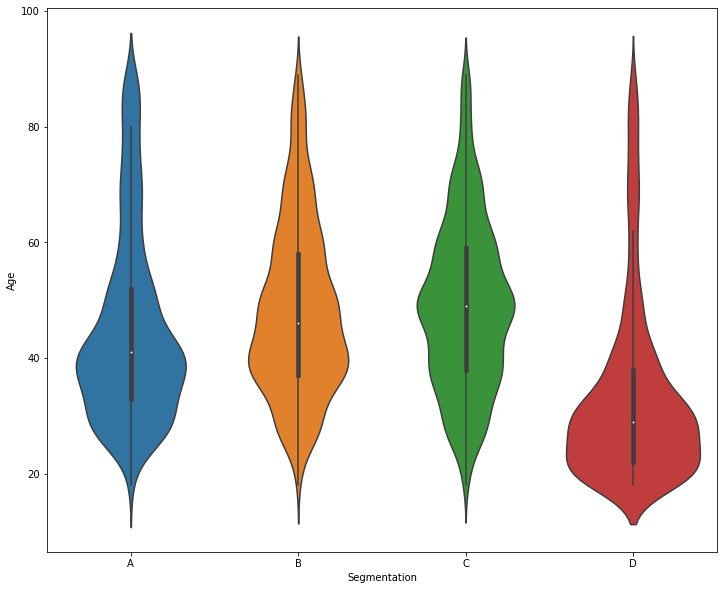

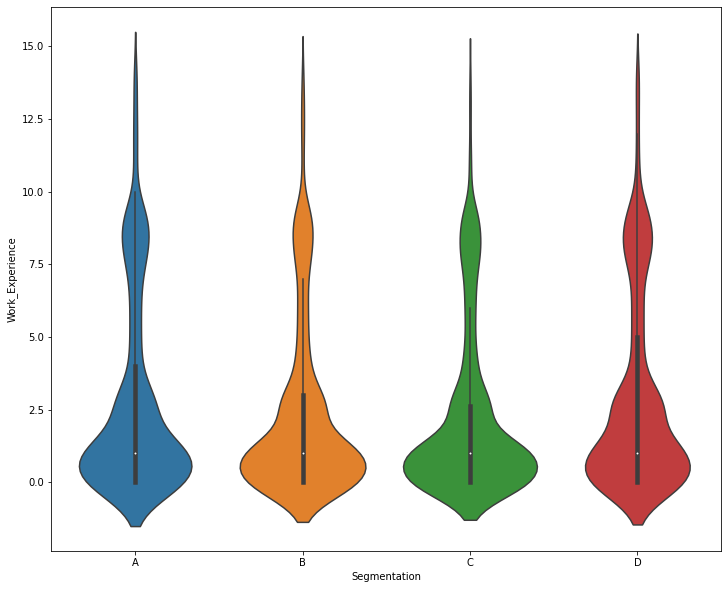

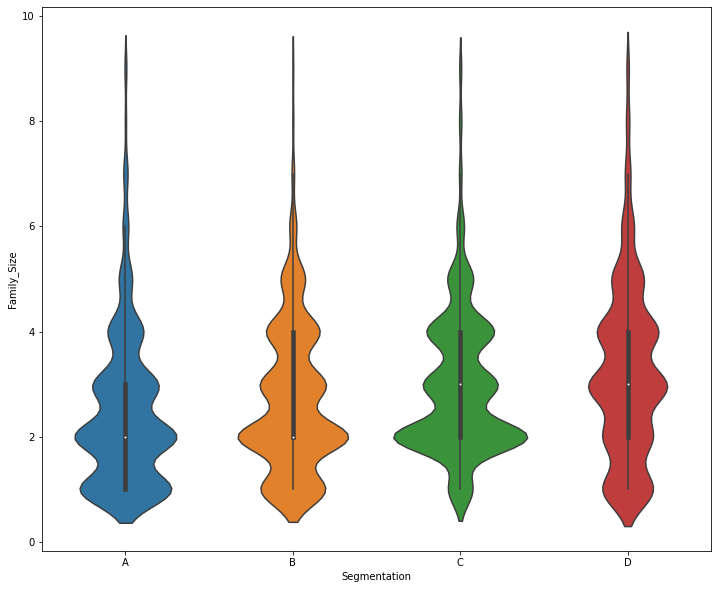

In [32]:
viz=visualizations()
viz.plot_violin(data,numCols)

1. The avg age for segment c is highest
2.Avg family size largest for segment c
3. Avg work ex is same for all segments

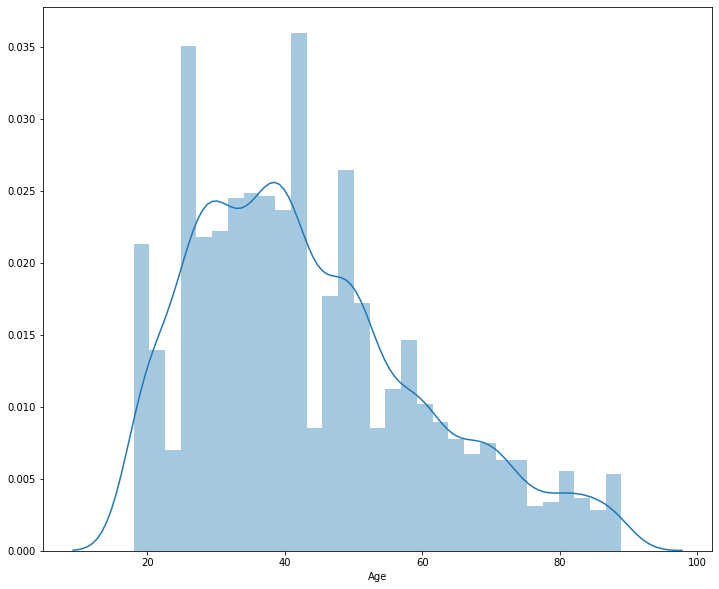

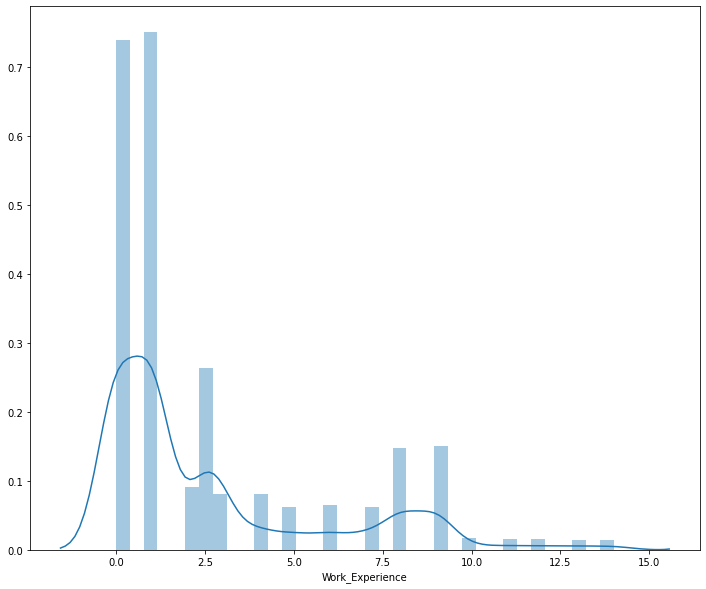

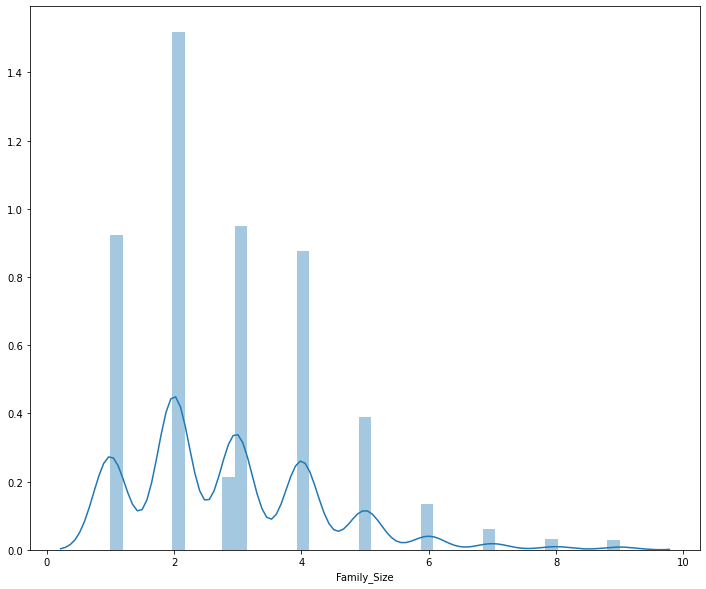

In [ ]:
viz.plot_dist(data, numCols)

1. The age column has a normal distribution
2. Work_ex column is right skewed.
3. Family_Size is multimodal

<Figure size 720x576 with 0 Axes>

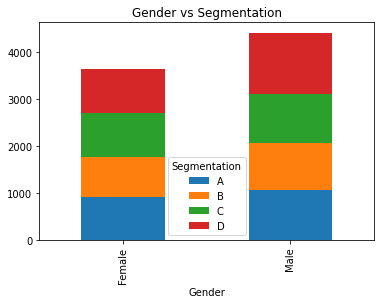

<Figure size 720x576 with 0 Axes>

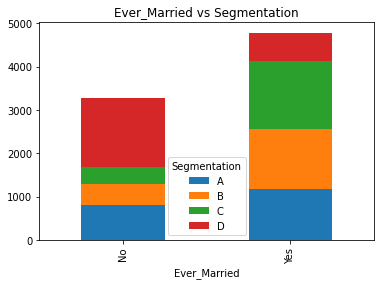

<Figure size 720x576 with 0 Axes>

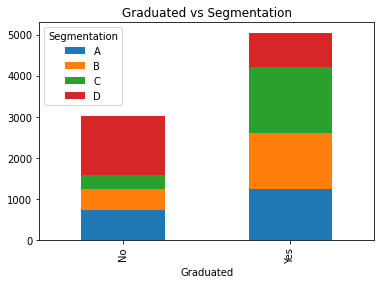

<Figure size 720x576 with 0 Axes>

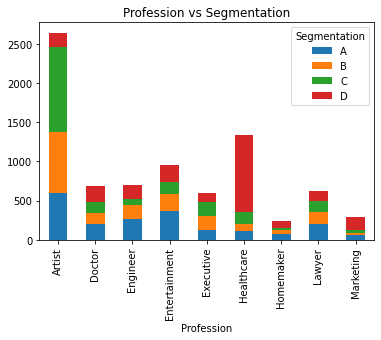

<Figure size 720x576 with 0 Axes>

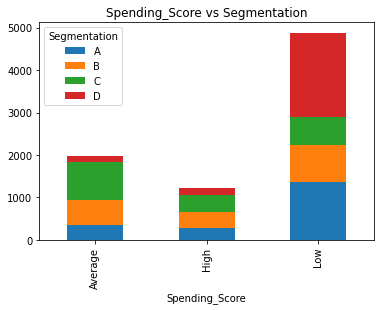

<Figure size 720x576 with 0 Axes>

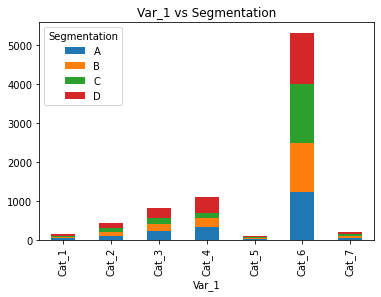

In [33]:
viz.plot_bivariate_cat(data, catCols)

Observation:
1. Category 6 has equal distribution of the segments
2. Segment D is more prevalent in ppl with low spending.
3. Ppl who are into healthcare, they have more of segment D where as artist has more of segment C.
4. Ppl with college degree have more segment D while ppl with no degree have
5.Unmarried ppl have greater share of segment D and married ppl have a greater share of C.

In [72]:
class FE:
   def __init__(self):
      pass
   def bin_numCols(self,df,numCols, n_bins): 
       for col in numCols[0:len(numCols)]:
          b=np.linspace(df[col].min(),df[col].max(),n_bins)
          df[col+'_Bin']=pd.cut(df[col],b, include_lowest=True,right=True)
       return df
   def create_cat_percent(self,df,catCols):
       for j in catCols[1:len(catCols)]:
            df[j+'_Percent']=df[j].groupby(df[j]).transform('count')/100
       return df

In [96]:
fe=FE()

In [98]:
data_bin=fe.bin_numCols(data,numCols,5)

In [99]:
data_bin.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Bin', 'Work_Experience_Bin', 'Family_Size_Bin'],
      dtype='object')

In [100]:
data_fe=fe.create_cat_percent(data_bin,catCols)

In [101]:
data_fe.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Work_Experience_Bin,Family_Size_Bin,Ever_Married_Percent,Graduated_Percent,Profession_Percent,Spending_Score_Percent,Var_1_Percent
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,"(17.999, 35.75]","(-0.001, 3.5]","(3.0, 5.0]",32.85,30.22,13.32,48.78,10.89
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,"(35.75, 53.5]","(-0.001, 3.5]","(0.999, 3.0]",47.83,50.46,6.99,19.74,10.89
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,"(53.5, 71.25]","(-0.001, 3.5]","(0.999, 3.0]",47.83,50.46,6.99,48.78,53.14
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,"(53.5, 71.25]","(-0.001, 3.5]","(0.999, 3.0]",47.83,50.46,6.23,12.16,53.14
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,"(35.75, 53.5]","(-0.001, 3.5]","(5.0, 7.0]",47.83,50.46,9.49,12.16,53.14


In [ ]:
data_fe.describe()

,ID,Age,Work_Experience,Family_Size,Ever_Married_Percent,Graduated_Percent,Profession_Percent,Spending_Score_Percent,Var_1_Percent
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.641663,2.850123,41.730682,42.878780,14.252702,36.155449,37.610818
std,2595.381232,16.711696,3.226972,1.499278,7.360219,9.796984,8.901544,15.783062,21.665345
min,458982.000000,18.000000,0.000000,1.000000,32.850000,30.220000,2.460000,12.160000,0.850000
25%,461240.750000,30.000000,0.000000,2.000000,32.850000,30.220000,6.880000,19.740000,10.890000
50%,463472.500000,40.000000,1.000000,2.850123,47.830000,50.460000,9.490000,48.780000,53.140000
75%,465744.250000,53.000000,4.000000,4.000000,47.830000,50.460000,26.400000,48.780000,53.140000
max,467974.000000,89.000000,14.000000,9.000000,47.830000,50.460000,26.400000,48.780000,53.140000


In [ ]:
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      8068 non-null   int64   
 1   Gender                  8068 non-null   category
 2   Ever_Married            8068 non-null   category
 3   Age                     8068 non-null   int64   
 4   Graduated               8068 non-null   category
 5   Profession              8068 non-null   category
 6   Work_Experience         8068 non-null   float64 
 7   Spending_Score          8068 non-null   category
 8   Family_Size             8068 non-null   float64 
 9   Var_1                   8068 non-null   category
 10  Segmentation            8068 non-null   category
 11  Work_Experience_Bin     8068 non-null   category
 12  Family_Size_Bin         8068 non-null   category
 13  Ever_Married_Percent    8068 non-null   float64 
 14  Graduated_Percent       

In [102]:
 
new_numCols=pp.get_num_cols(data_fe)
data_sc=pp.scale_numCols(data_fe,new_numCols)

In [103]:
data_sc.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Work_Experience_Bin,Family_Size_Bin,Ever_Married_Percent,Graduated_Percent,Profession_Percent,Spending_Score_Percent,Var_1_Percent
0,462809,Male,No,0.056338,No,Healthcare,0.071429,Low,0.375,Cat_4,D,"(17.999, 35.75]","(-0.001, 3.5]","(3.0, 5.0]",32.85,30.22,13.32,48.78,10.89
1,462643,Female,Yes,0.281690,Yes,Engineer,0.188690,Average,0.250,Cat_4,A,"(35.75, 53.5]","(-0.001, 3.5]","(0.999, 3.0]",47.83,50.46,6.99,19.74,10.89
2,466315,Female,Yes,0.690141,Yes,Engineer,0.071429,Low,0.000,Cat_6,B,"(53.5, 71.25]","(-0.001, 3.5]","(0.999, 3.0]",47.83,50.46,6.99,48.78,53.14
3,461735,Male,Yes,0.690141,Yes,Lawyer,0.000000,High,0.125,Cat_6,B,"(53.5, 71.25]","(-0.001, 3.5]","(0.999, 3.0]",47.83,50.46,6.23,12.16,53.14
4,462669,Female,Yes,0.309859,Yes,Entertainment,0.188690,High,0.625,Cat_6,A,"(35.75, 53.5]","(-0.001, 3.5]","(5.0, 7.0]",47.83,50.46,9.49,12.16,53.14


In [104]:
n_catCols=pp.get_cat_cols(data_sc)

In [ ]:
n_catCols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Work_Experience_Bin',
 'Family_Size_Bin']

In [105]:
data_enc=pp.one_hot_encode(data_sc,n_catCols)

In [106]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ID                                 8068 non-null   int64   
 1   Age                                8068 non-null   float64 
 2   Work_Experience                    8068 non-null   float64 
 3   Family_Size                        8068 non-null   float64 
 4   Segmentation                       8068 non-null   category
 5   Ever_Married_Percent               8068 non-null   float64 
 6   Graduated_Percent                  8068 non-null   float64 
 7   Profession_Percent                 8068 non-null   float64 
 8   Spending_Score_Percent             8068 non-null   float64 
 9   Var_1_Percent                      8068 non-null   float64 
 10  Gender_Female                      8068 non-null   uint8   
 11  Gender_Male                        8068 non

In [37]:
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
 from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [48]:
 import re

In [108]:
X=data_enc.drop(columns=['Segmentation'])
Y=data_enc[target]
 
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
 
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
 
X_train,X_test, Y_train, Y_test=train_test_split(X,Y, test_size=.4)

In [109]:
 cv=StratifiedShuffleSplit(n_splits=5)

In [110]:
 
svm=SVC()
kernel=['poly','rbf','sigmoid']
C=[50,10,1,.1,.01]
gamma=['scale']
grid=dict(kernel=kernel, C=C,gamma=gamma)

In [111]:
def tune_params(model,grid,X_train,Y_train):
    gs=GridSearchCV(estimator=model,param_grid=grid ,cv=cv, n_jobs=-1,scoring='accuracy')
    
 
    gs_res=gs.fit(X_train, Y_train)
    print('Best params:', gs_res.best_params_)
    return gs_res.best_estimator_

In [112]:
# svm 
 
best_model=tune_params(svm,grid,X_train,Y_train)
Yhat=best_model.predict(X_test)
print('Accuracy:', accuracy_score(Yhat,Y_test))

Best params: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.27942998760842624


In [113]:
solvers=['newton-cg','liblinear','lbfgs']
penalty=['l2']
c_values=[100,10,1,.1,.01]
grid=dict(solver=solvers, penalty=penalty, C=c_values)

In [114]:
lr=LogisticRegression()
best_model=tune_params(lr,grid,X_train,Y_train)
Yhat=best_model.predict(X_test)
print('Accuracy:', accuracy_score(Yhat,Y_test))

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best params: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.5034076827757125


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [51]:
dt=DecisionTreeClassifier()
best_model=tune_params(dt,grid)Yhat=best_model.predict(X_test)
print('Accuracy:', accuracy_score(Yhat,Y_test))

SyntaxError: ignored

In [128]:
#grid = {"n_estimators": [100,200,300,400]}
#grid={"max_depth":[3,4,5,6]}
#grid={"min_samples_split": np.arange(1,150,1)}
grid={"max_leaf_nodes": np.arange(2,60,1) }

In [129]:
 
rf=RandomForestClassifier(n_estimators=100,max_depth=6,min_samples_split=56)
best_model=tune_params(rf,grid,X_train,Y_train)
Yhat=best_model.predict(X_test)
print('Accuracy:', accuracy_score(Yhat,Y_test))

Best params: {'max_leaf_nodes': 38}
Accuracy: 0.5142503097893433


In [193]:
max_depth=[4,5,6],
min_child_weight=[6,7,8,10],
gamma=[i/10.0 for i in range(0,5)]
subsample=[.6,.7,.8,.9,1],
colsample_bytree=[.6,.7,.8,.9,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
 
 
#{'max_depth':[4,5,6]
#grid={'min_child_weight':[6,7,8,10]}#
#grid={'gamma':gamma,}
#grid={'subsample':[.6,.7,.8,.9,1]}
#grid={'reg_alpha':reg_alpha}
grid={'colsample_bytree':colsample_bytree}

In [194]:
xgb=XGBClassifier(max_depth=4,min_child_weight=8,gamma=0.0,subsample=.7,reg_alpha=1)
best_model_xgb=tune_params(xgb,grid,X_train,Y_train)
Yhat=best_model_xgb.predict(X_test)
print('Accuracy:', accuracy_score(Yhat,Y_test))

Best params: {'colsample_bytree': 0.7}
Accuracy: 0.5399628252788105


In [204]:
#read test file
filePath_test='/content/drive/My Drive/Test_LqhgPWU.csv'

In [205]:
t_data=pd.read_csv(filePath_test)

In [206]:
t_data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [207]:
t_data.Ever_Married.value_counts()

Yes    1520
No     1057
Name: Ever_Married, dtype: int64

In [208]:
t_data.Ever_Married.fillna('Yes',inplace=True)

In [209]:
t_data.Graduated.value_counts()

Yes    1602
No     1001
Name: Graduated, dtype: int64

In [210]:
 t_data.Graduated.fillna('Yes',inplace=True)

In [211]:
t_data.Profession.value_counts()

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64

In [212]:
t_data.Profession.fillna('Artist',inplace=True)

In [213]:
t_data.Work_Experience.fillna(t_data.Work_Experience.mean(),inplace=True)

In [214]:
t_data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [215]:
t_data.Family_Size.fillna(t_data.Family_Size.mean(),inplace=True)

In [216]:
t_data.Var_1.value_counts()

Cat_6    1672
Cat_4     386
Cat_3     267
Cat_2     141
Cat_7      66
Cat_1      34
Cat_5      29
Name: Var_1, dtype: int64

In [217]:
t_data.Var_1.fillna('Cat_6',inplace=True)

In [218]:
 t_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [219]:
t_data=pp.convertToCategory(t_data)

In [220]:
ID=t_data.ID

In [221]:
t_numCols=pp.get_num_cols(t_data)
t_numCols

['Age', 'Work_Experience', 'Family_Size']

In [222]:
t_catCols=pp.get_cat_cols(t_data)
t_catCols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [223]:
#FE of test data
t_data_fe=fe.bin_numCols(t_data,t_numCols,5)
t_data_fe.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Age_Bin',
       'Work_Experience_Bin', 'Family_Size_Bin'],
      dtype='object')

In [224]:
t_data_fe=fe.create_cat_percent(t_data_fe,catCols)
t_data_fe.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Age_Bin',
       'Work_Experience_Bin', 'Family_Size_Bin', 'Ever_Married_Percent',
       'Graduated_Percent', 'Profession_Percent', 'Spending_Score_Percent',
       'Var_1_Percent'],
      dtype='object')

In [225]:
t_catCols_n=pp.get_cat_cols(t_data_fe)

In [226]:
t_data_enc=pp.one_hot_encode(t_data_fe,t_catCols_n)

In [227]:
t_data_enc.columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Ever_Married_Percent',
       'Graduated_Percent', 'Profession_Percent', 'Spending_Score_Percent',
       'Var_1_Percent', 'Gender_Female', 'Gender_Male', 'Ever_Married_No',
       'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7',
       'Age_Bin_(17.999, 35.75]', 'Age_Bin_(35.75, 53.5]',
       'Age_Bin_(53.5, 71.25]', 'Age_Bin_(71.25, 89.0]',
       'Work_Experience_Bin_(-0.001, 3.5]', 'Work_Experience_Bin_(3.5, 7.0]',
       'Work_Experience_Bin_(7.0, 10.5]', 'Work_Experience_Bin_(10.5, 14.0]',
       'Fa

In [228]:
 X=t_data_enc
 
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
 
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [229]:
t_yhat=best_model_xgb.predict(X)

In [230]:
res=pd.DataFrame(t_yhat,columns=['Segmentation'])

In [231]:
res.head()

,Segmentation
0,A
1,D
2,A
3,A
4,D


In [232]:
Result=pd.concat([ID,res],axis=1)

In [233]:
Result.head()

,ID,Segmentation
0,458989,A
1,458994,D
2,458996,A
3,459000,A
4,459001,D


In [235]:
Result.to_csv('/content/drive/My Drive/Submission.csv')

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
